In [244]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.dates as mdates
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout,GRU
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from tensorflow.keras import optimizers, Model
import matplotlib.pyplot as plt
import math

# Load Data

In [245]:
import os
CURR_FOLDER_PATH = os.getcwd()
BASE_PATH = os.path.dirname(os.path.dirname(CURR_FOLDER_PATH))
DATA_PATH = os.path.join(BASE_PATH, 'Lulus/data')

In [246]:
df = pd.read_excel(DATA_PATH + '/Hargalagpasartradisionallagvariable.xlsx')
# Data yang digunakan yaitu Harga cabai Rawit dan Harga Bawang putih sebagai Barang Subtitusi Sudah dilakukan lag - 1 Minggu

In [247]:
df

,Tanggal,Harga Cabai Merah,Harga Cabai Rawit
0,01/ 01/ 2018,-,-
1,08/ 01/ 2018,38300,-
2,15/ 01/ 2018,42800,42600
3,22/ 01/ 2018,37850,42700
4,29/ 01/ 2018,38950,42600
...,...,...,...
308,27/ 11/ 2023,80250,76600
309,04/ 12/ 2023,94900,79150
310,11/ 12/ 2023,99300,79100
311,18/ 12/ 2023,85000,75550


# Statistical Analytics

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Tanggal            313 non-null    object
 1   Harga Cabai Merah  313 non-null    object
 2   Harga Cabai Rawit  313 non-null    object
dtypes: object(3)
memory usage: 7.5+ KB


In [249]:
df.shape

(313, 3)

In [250]:
df.replace('-', pd.NA, inplace=True)

In [251]:
missing_values = df.isnull().sum()
percentage_missing = (missing_values / df.shape[0]) * 100
print("Jumlah Missing Value per Kolom:")
print(missing_values)
print("\nPersentase Missing Value per Kolom:")
percentage_missing

Jumlah Missing Value per Kolom:
Tanggal              0
Harga Cabai Merah    9
Harga Cabai Rawit    9
dtype: int64

Persentase Missing Value per Kolom:


Tanggal              0.000000
Harga Cabai Merah    2.875399
Harga Cabai Rawit    2.875399
dtype: float64

In [252]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/ %m/ %Y')
df['Bulan'] = df['Tanggal'].dt.to_period('M')
mean_values = df.groupby('Bulan').mean()


def fill_missing_with_mean(row):
    if pd.isna(row['Harga Cabai Merah']):
        row['Harga Cabai Merah'] = mean_values.loc[row['Bulan'], 'Harga Cabai Merah']
    if pd.isna(row['Harga Cabai Rawit']):
        row['Harga Cabai Rawit'] = mean_values.loc[row['Bulan'], 'Harga Cabai Rawit']
    return row


df = df.apply(fill_missing_with_mean, axis=1)
print(df)

       Tanggal  Harga Cabai Merah  Harga Cabai Rawit    Bulan
0   2018-01-01       39475.000000       42633.333333  2018-01
1   2018-01-08       38300.000000       42633.333333  2018-01
2   2018-01-15       42800.000000       42600.000000  2018-01
3   2018-01-22       37850.000000       42700.000000  2018-01
4   2018-01-29       38950.000000       42600.000000  2018-01
..         ...                ...                ...      ...
308 2023-11-27       80250.000000       76600.000000  2023-11
309 2023-12-04       94900.000000       79150.000000  2023-12
310 2023-12-11       99300.000000       79100.000000  2023-12
311 2023-12-18       85000.000000       75550.000000  2023-12
312 2023-12-25       93066.666667       66350.000000  2023-12

[313 rows x 4 columns]


In [253]:
df['Harga Cabai Merah'] = df['Harga Cabai Merah'].astype('float64')
df['Harga Cabai Rawit'] = df['Harga Cabai Rawit'].astype('float64')

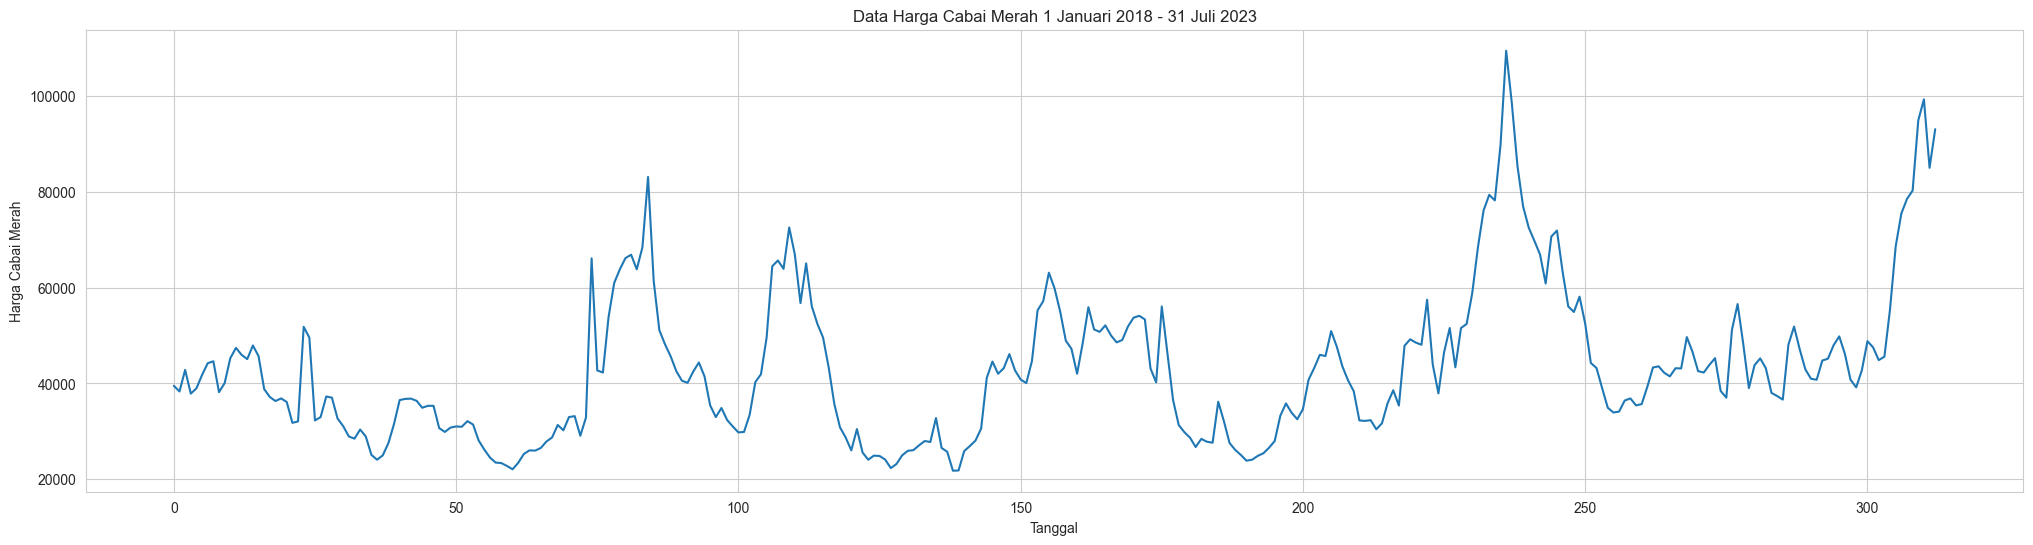

In [254]:
# Visualisasi
plt.figure(figsize=(25, 6))
plt.plot(df.index, df['Harga Cabai Merah'])
plt.title('Data Harga Cabai Merah 1 Januari 2018 - 31 Juli 2023')
plt.xlabel('Tanggal')
plt.ylabel('Harga Cabai Merah')
plt.show()

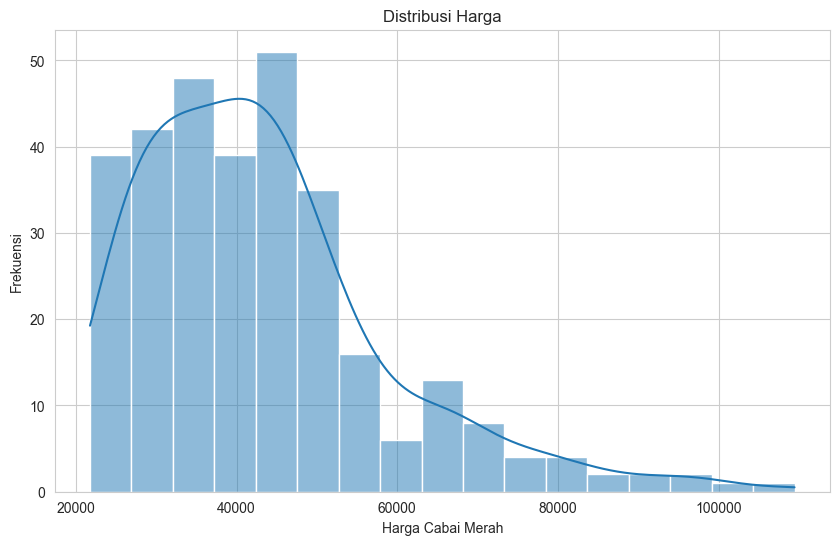

In [255]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Harga Cabai Merah'], kde=True)
plt.title('Distribusi Harga')
plt.xlabel('Harga Cabai Merah')
plt.ylabel('Frekuensi')
plt.show()

# Preprocessing Data


In [256]:
scaler_rr = MinMaxScaler(feature_range=(0, 1))
scaler_harga = MinMaxScaler(feature_range=(0, 1))
df['Harga Cabai Merah_Scaled'] = scaler_harga.fit_transform(df[['Harga Cabai Merah']])
df['Harga Cabai Rawit_Scaled'] = scaler_rr.fit_transform(df[['Harga Cabai Rawit']])

In [257]:
df.head()

,Tanggal,Harga Cabai Merah,Harga Cabai Rawit,Bulan,Harga Cabai Merah_Scaled,Harga Cabai Rawit_Scaled
0,2018-01-01,39475.0,42633.333333,2018-01,0.202109,0.256345
1,2018-01-08,38300.0,42633.333333,2018-01,0.188712,0.256345
2,2018-01-15,42800.0,42600.000000,2018-01,0.240023,0.255918
3,2018-01-22,37850.0,42700.000000,2018-01,0.183580,0.257198
4,2018-01-29,38950.0,42600.000000,2018-01,0.196123,0.255918


# Split Data

In [258]:
selected_columns = ['Harga Cabai Merah_Scaled']
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)][selected_columns].values
        dataX.append(a)
        dataY.append(dataset[i + look_back:i + look_back + 1]['Harga Cabai Merah_Scaled'].values)
    return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], len(selected_columns)))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], len(selected_columns)))

# Pembuatan Model

In [259]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1), activation='relu'))
model.add(LSTM(units=64, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(trainX, trainY, epochs=65, batch_size=64, verbose=1)


Epoch 1/65


4/4 [==============================] - 3s 4ms/step - loss: 0.0811
Epoch 2/65
4/4 [==============================] - 0s 4ms/step - loss: 0.0771
Epoch 3/65
4/4 [==============================] - 0s 4ms/step - loss: 0.0733
Epoch 4/65
4/4 [==============================] - 0s 5ms/step - loss: 0.0695
Epoch 5/65
4/4 [==============================] - 0s 4ms/step - loss: 0.0656
Epoch 6/65
4/4 [==============================] - 0s 5ms/step - loss: 0.0617
Epoch 7/65
4/4 [==============================] - 0s 4ms/step - loss: 0.0576
Epoch 8/65
4/4 [==============================] - 0s 4ms/step - loss: 0.0534
Epoch 9/65
4/4 [==============================] - 0s 4ms/step - loss: 0.0495
Epoch 10/65
4/4 [==============================] - 0s 4ms/step - loss: 0.0455
Epoch 11/65
4/4 [==============================] - 0s 5ms/step - loss: 0.0413
Epoch 12/65
4/4 [==============================] - 0s 4ms/step - loss: 0.0376
Epoch 13/65
4/4 [==============================] - 0s 4ms/step - loss: 0.0337
Epoch 

In [260]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 1, 50)             10400     
                                                                 
 lstm_19 (LSTM)              (None, 64)                29440     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [261]:
import tensorflow as tf

# Simpan model dalam format .h5
model.save("modelunivariate.h5")

# Muat kembali model dari file .h5
model = tf.keras.models.load_model("modelunivariate.h5")

# Gunakan model seperti yang Anda butuhkan

In [262]:
testX

array([[[0.35005701]],

       [[0.25655644]],

       [[0.24458381]],

       [[0.19669327]],

       [[0.14994299]],

       [[0.13854048]],

       [[0.14082098]],

       [[0.16704675]],

       [[0.17217788]],

       [[0.15564424]],

       [[0.15849487]],

       [[0.1995439 ]],

       [[0.24572406]],

       [[0.24857469]],

       [[0.2331813 ]],

       [[0.22462942]],

       [[0.24401368]],

       [[0.24344356]],

       [[0.31812999]],

       [[0.28335234]],

       [[0.23717218]],

       [[0.23375143]],

       [[0.25199544]],

       [[0.26795895]],

       [[0.18985177]],

       [[0.17388826]],

       [[0.33580388]],

       [[0.3968073 ]],

       [[0.30159635]],

       [[0.19669327]],

       [[0.25142531]],

       [[0.26738883]],

       [[0.24401368]],

       [[0.18529076]],

       [[0.17787913]],

       [[0.16932725]],

       [[0.3004561 ]],

       [[0.34321551]],

       [[0.28905359]],

       [[0.24116306]],

       [[0.21892816]],

       [[0.21664

In [263]:
predictions = model.predict(trainX)
last_prediction = predictions[-1]
testX[0][0][0] = last_prediction

8/8 [==============================] - 0s 2ms/step


In [264]:
testX

array([[[0.3552725 ]],

       [[0.25655644]],

       [[0.24458381]],

       [[0.19669327]],

       [[0.14994299]],

       [[0.13854048]],

       [[0.14082098]],

       [[0.16704675]],

       [[0.17217788]],

       [[0.15564424]],

       [[0.15849487]],

       [[0.1995439 ]],

       [[0.24572406]],

       [[0.24857469]],

       [[0.2331813 ]],

       [[0.22462942]],

       [[0.24401368]],

       [[0.24344356]],

       [[0.31812999]],

       [[0.28335234]],

       [[0.23717218]],

       [[0.23375143]],

       [[0.25199544]],

       [[0.26795895]],

       [[0.18985177]],

       [[0.17388826]],

       [[0.33580388]],

       [[0.3968073 ]],

       [[0.30159635]],

       [[0.19669327]],

       [[0.25142531]],

       [[0.26738883]],

       [[0.24401368]],

       [[0.18529076]],

       [[0.17787913]],

       [[0.16932725]],

       [[0.3004561 ]],

       [[0.34321551]],

       [[0.28905359]],

       [[0.24116306]],

       [[0.21892816]],

       [[0.21664

In [265]:
for i in range(3):
    if i == 0:
        prediksi = model.predict(testX[:1])
    else:
        prediksi = model.predict(testX[i:i+1])
    if i+1 < len(testX):
        testX[i+1][0][0] = prediksi

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


In [266]:
testX

array([[[0.3552725 ]],

       [[0.33374479]],

       [[0.3137559 ]],

       [[0.29551491]],

       [[0.14994299]],

       [[0.13854048]],

       [[0.14082098]],

       [[0.16704675]],

       [[0.17217788]],

       [[0.15564424]],

       [[0.15849487]],

       [[0.1995439 ]],

       [[0.24572406]],

       [[0.24857469]],

       [[0.2331813 ]],

       [[0.22462942]],

       [[0.24401368]],

       [[0.24344356]],

       [[0.31812999]],

       [[0.28335234]],

       [[0.23717218]],

       [[0.23375143]],

       [[0.25199544]],

       [[0.26795895]],

       [[0.18985177]],

       [[0.17388826]],

       [[0.33580388]],

       [[0.3968073 ]],

       [[0.30159635]],

       [[0.19669327]],

       [[0.25142531]],

       [[0.26738883]],

       [[0.24401368]],

       [[0.18529076]],

       [[0.17787913]],

       [[0.16932725]],

       [[0.3004561 ]],

       [[0.34321551]],

       [[0.28905359]],

       [[0.24116306]],

       [[0.21892816]],

       [[0.21664

In [267]:
predictions = model.predict(testX)
predictions = scaler_harga.inverse_transform(predictions)
testY = scaler_harga.inverse_transform(testY)

2/2 [==============================] - 0s 7ms/step


In [268]:
trainY = scaler_harga.inverse_transform(trainY)

In [269]:
df_test = pd.DataFrame({'Actual': np.squeeze(testY), 'Predicted': np.squeeze(predictions)})
df_test.head(30)

,Actual,Predicted
0,44250.0,51019.414062
1,43200.0,49266.394531
2,39000.0,47666.660156
3,34900.0,46227.890625
4,33900.0,35572.601562
5,34100.0,34797.671875
6,36400.0,34951.992188
7,36850.0,36750.699219
8,35400.0,37107.839844
9,35650.0,35963.195312


In [270]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)
df.sort_index(inplace=True)
df.index = pd.to_datetime(df.index)

# Hasil Akhir

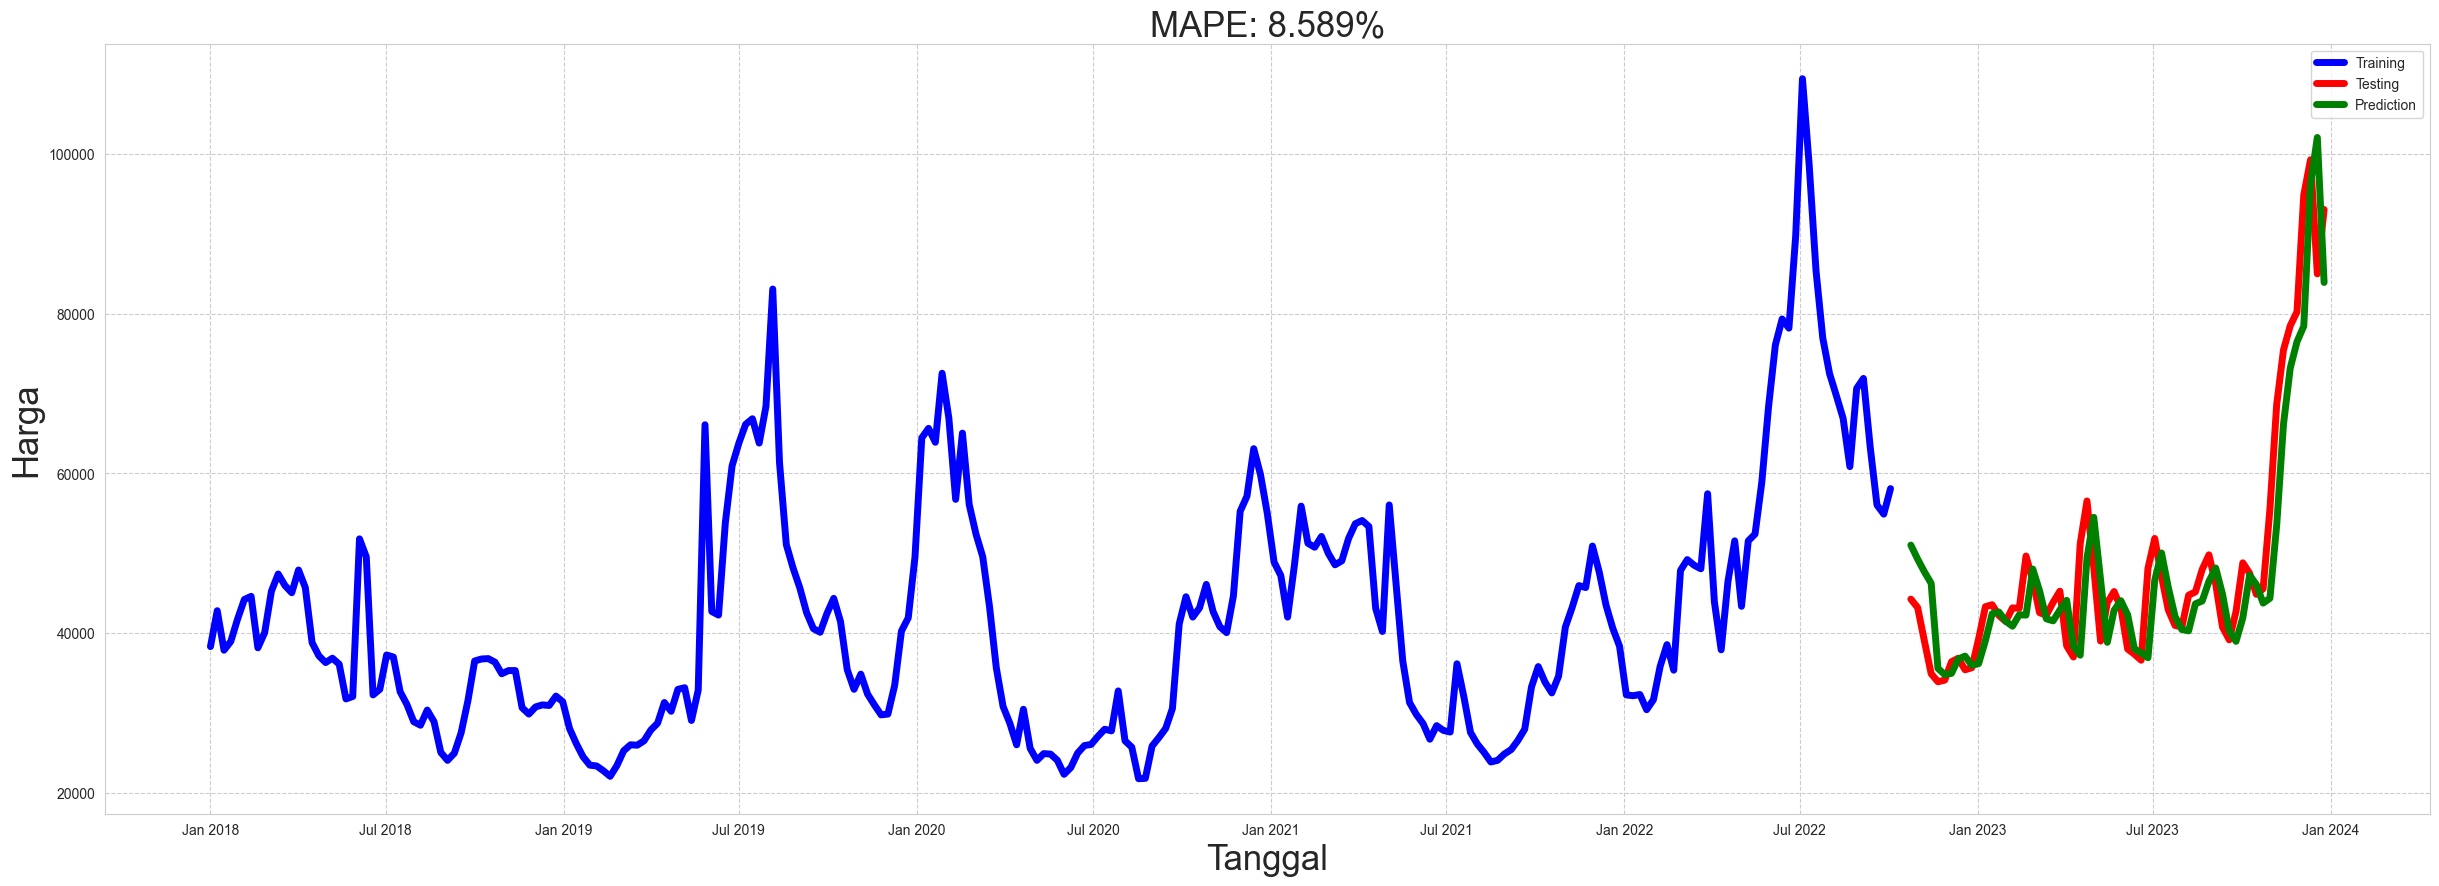

In [272]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib.dates import MonthLocator, DateFormatter
mape = mean_absolute_percentage_error(testY, predictions)*100

plt.figure(figsize=(30, 10))
plt.plot(df.index[:len(trainY)], trainY, label='Training', marker='', color='blue', linestyle='-', linewidth=5)
plt.plot(df.index[-len(testY):], testY, label='Testing', marker='', color='red', linestyle='-', linewidth=5)
plt.plot(df.index[-len(predictions):], predictions, label='Prediction', marker='', color='green', linestyle='-', linewidth=5)
plt.title(f'MAPE: {mape:.3f}%', fontsize=25)
plt.xlabel('Tanggal', fontsize=25)
plt.ylabel('Harga', fontsize=25)
plt.grid(True, linestyle='--', alpha=1)
plt.legend()

locator = MonthLocator(bymonth=[1, 7])
formatter = DateFormatter('%b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=0)
plt.show()
